In [49]:
import pandas as pd

musicdf=pd.read_csv("spotify_dat.csv")
musicdf.columns


Index(['Unnamed: 0', 'name', 'uri', 'album_uri', 'album_name',
       'album_popularity', 'artist_uri', 'artist_name', 'artist_popularity',
       'artist_followers', 'explicit', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'mode',
       'num_of_sections', 'num_of_keys', 'num_of_modes',
       'num_of_time_signatures', 'df_label', 'recently_played', 'saved_tracks',
       'top_tracks', 'Rating01', 'Rating0-5', 'AddPlylst01',
       'release_year_from_2020', 'duration_minutes',
       'section_durations_variance', 'section_durations_min',
       'section_durations_max', 'section_loudnesses_variance',
       'section_loudnesses_min', 'section_loudnesses_max',
       'section_tempos_variance', 'section_tempos_min', 'section_tempos_max',
       'album_big_label', 'album_medium_label', 'genre_alternative metal/rock',
       'genre_background', 'genre_baroque classic', 'ge

In [249]:
musicdf.groupby('AddPlylst01').count()

Unnamed: 0  name  uri  album_uri  album_name  album_popularity  \
AddPlylst01                                                                   
0.0                 193   193  193        193         193               193   
1.0                 181   181  181        181         181               181   

             artist_uri  artist_name  artist_popularity  artist_followers  \
AddPlylst01                                                                 
0.0                 193          193                193               193   
1.0                 181          181                181               181   

             ...  overall_key_2  overall_key_3  overall_key_4  overall_key_5  \
AddPlylst01  ...                                                               
0.0          ...            193            193            193            193   
1.0          ...            181            181            181            181   

             overall_key_6  overall_key_7  overall_key_8  overall_key_9  \
AddPlylst01                                                               
0.0                    193            193            193            193   
1.0                    181            181            181            181   

             overall_key_10  overall_key_11  
AddPlylst01                                  
0.0                     193             193  
1.0                     181             181  

[2 rows x 73 columns]

In [2]:
musicdf.shape

(21445, 74)

In [50]:
musicdf.dropna(subset=['Rating0-5'], inplace=True)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as cv
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Visualizations

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\glory\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\glory\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


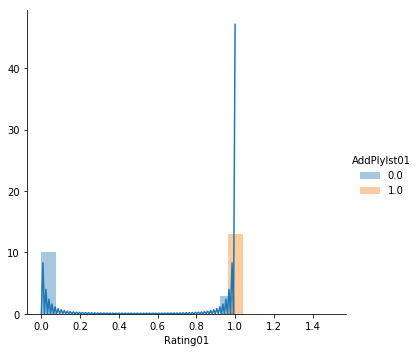

In [184]:
sns.FacetGrid(musicdf,hue='AddPlylst01',size=5).map(sns.distplot,'Rating01').add_legend()

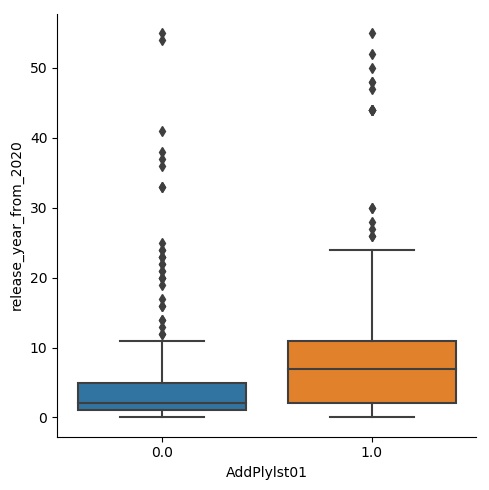

In [195]:
import matplotlib.pyplot as plt
sns.catplot(x="AddPlylst01", y="release_year_from_2020", kind="box", data=musicdf)

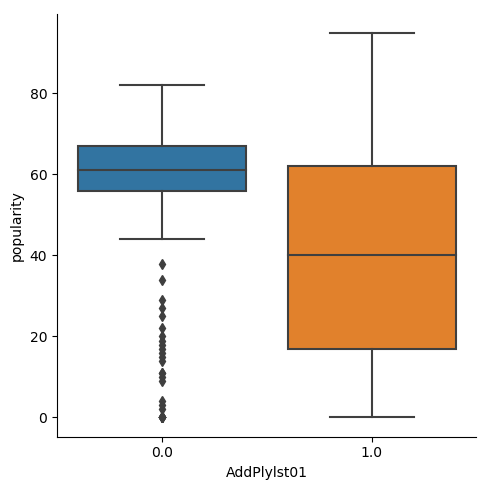

In [196]:
sns.catplot(x="AddPlylst01", y="popularity", kind="box", data=musicdf);

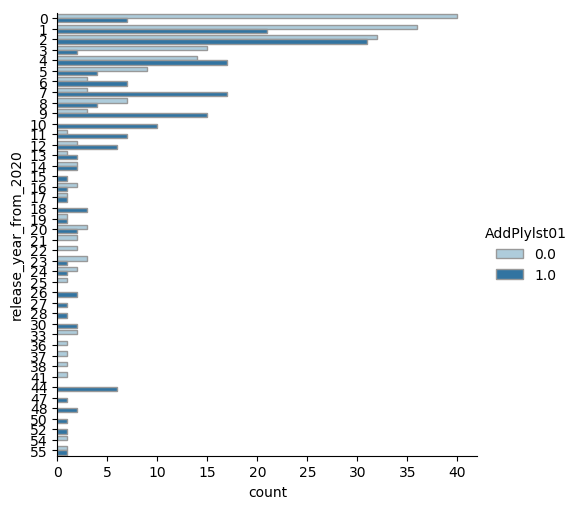

In [219]:
sns.catplot(y="release_year_from_2020", hue="AddPlylst01", kind="count",
            palette="Paired", edgecolor=".6",
            data=musicdf)

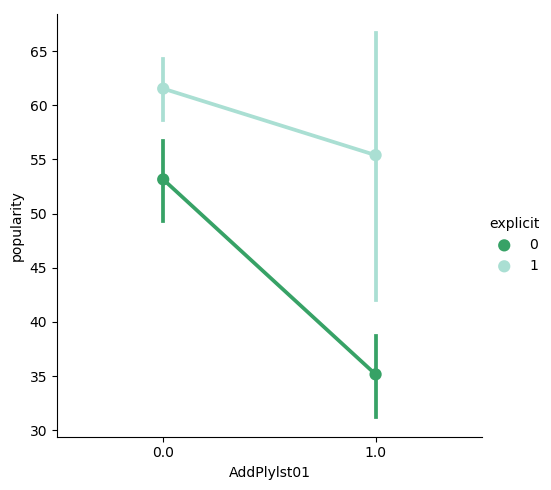

In [312]:
sns.catplot(x="AddPlylst01", y="popularity", hue="explicit", kind="point", palette="BuGn_r",data=musicdf)

# PCA on Rating 01

In [57]:
y=musicdf[['Rating01']]
X=musicdf[['artist_popularity',
       'artist_followers', 'explicit', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
        'mode', 'num_of_sections',
       'num_of_keys', 'num_of_modes', 'num_of_time_signatures',
        'release_year_from_2020',
       'duration_minutes', 'section_durations_variance',
       'section_durations_min', 'section_durations_max',
       'section_loudnesses_variance', 'section_loudnesses_min',
       'section_loudnesses_max', 'section_tempos_variance',
       'section_tempos_min', 'section_tempos_max', 'album_big_label',
       'album_medium_label', 'genre_alternative metal/rock',
       'genre_background', 'genre_baroque classic', 'genre_classical',
       'genre_country', 'genre_hip hop', 'genre_house', 'genre_indie',
       'genre_mexican', 'genre_pop', 'genre_rap', 'genre_rock','time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'overall_key_1', 'overall_key_2', 'overall_key_3',
       'overall_key_4', 'overall_key_5', 'overall_key_6', 'overall_key_7',
       'overall_key_8', 'overall_key_9', 'overall_key_10', 'overall_key_11']]


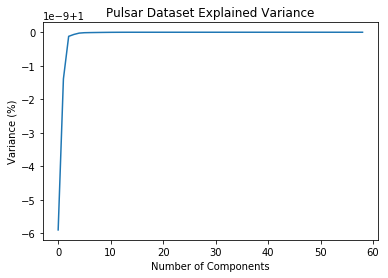

In [58]:
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [59]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(X)
dataset=pd.DataFrame(dataset)
X=dataset

In [60]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=0.16, random_state=0)
svm=SVC()
rf=RandomForestClassifier(random_state=1)
bc = BaggingClassifier( n_estimators=300,
n_jobs=-1)
#vc = VotingClassifier(estimators=classifiers)
# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt),
('Random Forest',rf),
('SVM',svm),
('Bagging Classifier',bc)]

In [61]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20)
for clf_name, clf in classifiers:
   #fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)
    y_pred_train=clf.predict(x_train)
    testAcc1=accuracy_score(y_test, y_pred)
    trainAcc1=accuracy_score(y_train, y_pred_train)
    CVscore1=cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
# Evaluate the accuracy of clf on the test set
    print('{:s} Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(clf_name,trainAcc1,CVscore1,testAcc1
    ))
    

C:\Users\glory\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Logistic Regression Training Accuracy : 0.632 CV Accuracy:0.635 Testing Accuracy:0.560
K Nearest Neighbours Training Accuracy : 0.789 CV Accuracy:0.586 Testing Accuracy:0.653
Classification Tree Training Accuracy : 0.662 CV Accuracy:0.628 Testing Accuracy:0.600


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Training Accuracy : 0.993 CV Accuracy:0.532 Testing Accuracy:0.547
SVM Training Accuracy : 1.000 CV Accuracy:0.592 Testing Accuracy:0.627

C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Classifier Training Accuracy : 1.000 CV Accuracy:0.636 Testing Accuracy:0.600


# PCA on AddPlylist01

In [63]:
Y=musicdf[['AddPlylst01']]
x=musicdf[['artist_popularity',
       'artist_followers', 'explicit', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
        'mode', 'num_of_sections',
       'num_of_keys', 'num_of_modes', 'num_of_time_signatures',
        'release_year_from_2020',
       'duration_minutes', 'section_durations_variance',
       'section_durations_min', 'section_durations_max',
       'section_loudnesses_variance', 'section_loudnesses_min',
       'section_loudnesses_max', 'section_tempos_variance',
       'section_tempos_min', 'section_tempos_max', 'album_big_label',
       'album_medium_label', 'genre_alternative metal/rock',
       'genre_background', 'genre_baroque classic', 'genre_classical',
       'genre_country', 'genre_hip hop', 'genre_house', 'genre_indie',
       'genre_mexican', 'genre_pop', 'genre_rap', 'genre_rock','time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'overall_key_1', 'overall_key_2', 'overall_key_3',
       'overall_key_4', 'overall_key_5', 'overall_key_6', 'overall_key_7',
       'overall_key_8', 'overall_key_9', 'overall_key_10', 'overall_key_11']]



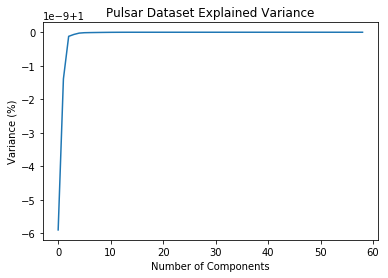

In [64]:
pca = PCA().fit(x)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [66]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(x)
dataset=pd.DataFrame(dataset)
x=dataset

In [67]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, Y, test_size=.20)
for clf_name, clf in classifiers:
   #fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)
    y_pred_train=clf.predict(x_train)
    testAcc1=accuracy_score(y_test, y_pred)
    trainAcc1=accuracy_score(y_train, y_pred_train)
    CVscore1=cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
# Evaluate the accuracy of clf on the test set
    print('{:s} Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(clf_name,trainAcc1,CVscore1,testAcc1
    ))

C:\Users\glory\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Logistic Regression Training Accuracy : 0.602 CV Accuracy:0.555 Testing Accuracy:0.560
K Nearest Neighbours Training Accuracy : 0.773 CV Accuracy:0.625 Testing Accuracy:0.693
Classification Tree Training Accuracy : 0.649 CV Accuracy:0.573 Testing Accuracy:0.600


C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Training Accuracy : 0.993 CV Accuracy:0.602 Testing Accuracy:0.573


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Training Accuracy : 1.000 CV Accuracy:0.508 Testing Accuracy:0.547


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Classifier Training Accuracy : 1.000 CV Accuracy:0.652 Testing Accuracy:0.573


### Decide against PCA

# feature importance dimension reduction

In [68]:

y=musicdf[['Rating01']]
X=musicdf[['artist_popularity',
       'artist_followers', 'explicit', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
        'mode', 'num_of_sections',
       'num_of_keys', 'num_of_modes', 'num_of_time_signatures',
        'release_year_from_2020',
       'duration_minutes', 'section_durations_variance',
       'section_durations_min', 'section_durations_max',
       'section_loudnesses_variance', 'section_loudnesses_min',
       'section_loudnesses_max', 'section_tempos_variance',
       'section_tempos_min', 'section_tempos_max', 'album_big_label',
       'album_medium_label', 'genre_alternative metal/rock',
       'genre_background', 'genre_baroque classic', 'genre_classical',
       'genre_country', 'genre_hip hop', 'genre_house', 'genre_indie',
       'genre_mexican', 'genre_pop', 'genre_rap', 'genre_rock','time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'overall_key_1', 'overall_key_2', 'overall_key_3',
       'overall_key_4', 'overall_key_5', 'overall_key_6', 'overall_key_7',
       'overall_key_8', 'overall_key_9', 'overall_key_10', 'overall_key_11']]
(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20)

In [69]:
SEED=1


In [17]:

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=0.16, random_state=0)
svm=SVC()
rf=RandomForestClassifier(random_state=1)
bc = BaggingClassifier( n_estimators=300,
n_jobs=-1)
#vc = VotingClassifier(estimators=classifiers)
# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt),
('Random Forest',rf),
('SVM',svm),
('Bagging Classifier',bc)]

In [70]:
for clf_name, clf in classifiers:
   #fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)
    y_pred_train=clf.predict(x_train)
    testAcc1=accuracy_score(y_test, y_pred)
    trainAcc1=accuracy_score(y_train, y_pred_train)
    CVscore1=cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
# Evaluate the accuracy of clf on the test set
    print('{:s} Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(clf_name,trainAcc1,CVscore1,testAcc1
    ))
    


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Logistic Regression Training Accuracy : 0.676 CV Accuracy:0.669 Testing Accuracy:0.613
K Nearest Neighbours Training Accuracy : 0.726 CV Accuracy:0.595 Testing Accuracy:0.640
Classification Tree Training Accuracy : 0.739 CV Accuracy:0.686 Testing Accuracy:0.680


C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Training Accuracy : 0.993 CV Accuracy:0.705 Testing Accuracy:0.707


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Training Accuracy : 1.000 CV Accuracy:0.599 Testing Accuracy:0.600


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Classifier Training Accuracy : 1.000 CV Accuracy:0.719 Testing Accuracy:0.667


# using add to playlist or not

In [290]:
Y=musicdf[['AddPlylst01']]
x=musicdf[['artist_popularity',
       'artist_followers', 'explicit', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
        'mode', 'num_of_sections',
       'num_of_keys', 'num_of_modes', 'num_of_time_signatures',
        'release_year_from_2020',
       'duration_minutes', 'section_durations_variance',
       'section_durations_min', 'section_durations_max',
       'section_loudnesses_variance', 'section_loudnesses_min',
       'section_loudnesses_max', 'section_tempos_variance',
       'section_tempos_min', 'section_tempos_max', 'album_big_label',
       'album_medium_label', 'genre_alternative metal/rock',
       'genre_background', 'genre_baroque classic', 'genre_classical',
       'genre_country', 'genre_hip hop', 'genre_house', 'genre_indie',
       'genre_mexican', 'genre_pop', 'genre_rap', 'genre_rock','time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'overall_key_1', 'overall_key_2', 'overall_key_3',
       'overall_key_4', 'overall_key_5', 'overall_key_6', 'overall_key_7',
       'overall_key_8', 'overall_key_9', 'overall_key_10', 'overall_key_11']]
(X_train, X_test, Y_train, Y_test) = cv.train_test_split(x, Y, test_size=.20)


In [291]:
for clf_name, clf in classifiers:
   #fit clf to the training set
    clf.fit(X_train, Y_train)
# Predict the labels of the test set
    Y_pred = clf.predict(X_test)
    Y_pred_train=clf.predict(X_train)
    testAcc=accuracy_score(Y_test, Y_pred)
    trainAcc=accuracy_score(Y_train, Y_pred_train)
    CVscore=cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
# Evaluate the accuracy of clf on the test set
    print('{:s} Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(clf_name,trainAcc,CVscore,testAcc
    ))
    


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Logistic Regression Training Accuracy : 0.585 CV Accuracy:0.579 Testing Accuracy:0.453
K Nearest Neighbours Training Accuracy : 0.769 CV Accuracy:0.652 Testing Accuracy:0.773
Classification Tree Training Accuracy : 0.749 CV Accuracy:0.692 Testing Accuracy:0.707
Random Forest Training Accuracy : 0.980 CV Accuracy:0.776 Testing Accuracy:0.773


C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Training Accuracy : 1.000 CV Accuracy:0.539 Testing Accuracy:0.427


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Classifier Training Accuracy : 1.000 CV Accuracy:0.796 Testing Accuracy:0.787


In [292]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
Y_pred_train=rf.predict(X_train)
testAcc=accuracy_score(Y_test, Y_pred)
trainAcc=accuracy_score(Y_train, Y_pred_train)
CVscore=cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()

print('Random Forest Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(trainAcc,CVscore,testAcc
    ))

Random Forest Training Accuracy : 0.980 CV Accuracy:0.776 Testing Accuracy:0.773


C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


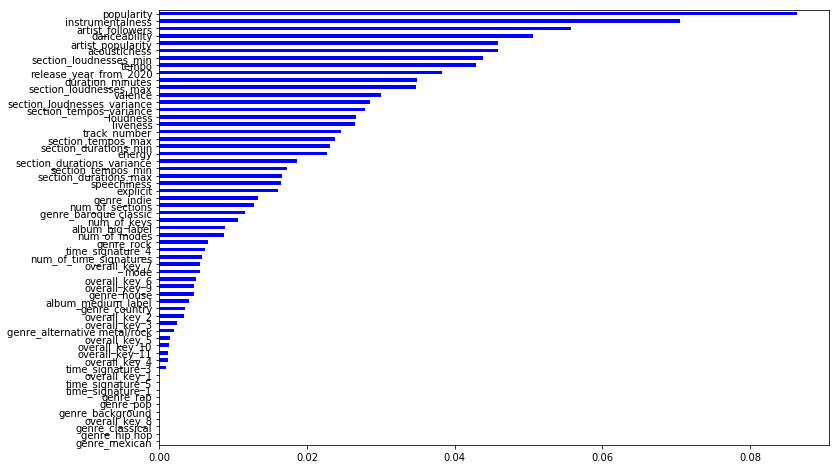

In [75]:

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

# manually removing features

In [293]:
x=x.drop(columns=['genre_alternative metal/rock',
       'genre_background', 'genre_baroque classic', 'genre_classical',
       'genre_country', 'genre_hip hop', 'genre_house', 'genre_indie',
       'genre_mexican', 'genre_pop', 'genre_rap', 'genre_rock'])
(X_train, X_test, Y_train, Y_test) = cv.train_test_split(x, Y, test_size=.20)

In [294]:
rf=RandomForestClassifier(random_state=1)


rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
Y_pred_train=rf.predict(X_train)
testAcc=accuracy_score(Y_test, Y_pred)
trainAcc=accuracy_score(Y_train, Y_pred_train)
CVscore=cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()

print('Random Forest Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(trainAcc,CVscore,testAcc
    ))

Random Forest Training Accuracy : 0.983 CV Accuracy:0.750 Testing Accuracy:0.707


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [295]:
x=x.drop(columns=['time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'])
(X_train, X_test, Y_train, Y_test) = cv.train_test_split(x, Y, test_size=.20)


In [296]:
rf=RandomForestClassifier(random_state=1)


rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
Y_pred_train=rf.predict(X_train)
testAcc=accuracy_score(Y_test, Y_pred)
trainAcc=accuracy_score(Y_train, Y_pred_train)
CVscore=cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()

print('Random Forest Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(trainAcc,CVscore,testAcc
    ))
    

Random Forest Training Accuracy : 0.997 CV Accuracy:0.796 Testing Accuracy:0.667


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


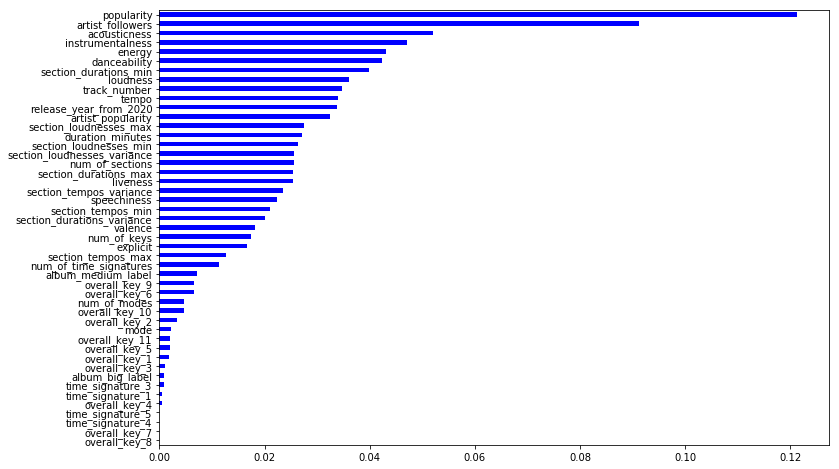

In [99]:

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

Seems overfit, try dropping one more feature

In [298]:
x=x.drop(columns=['overall_key_1', 'overall_key_2', 'overall_key_3',
       'overall_key_4', 'overall_key_5', 'overall_key_6', 'overall_key_7',
       'overall_key_8', 'overall_key_9', 'overall_key_10', 'overall_key_11'])
(X_train, X_test, Y_train, Y_test) = cv.train_test_split(x, Y, test_size=.20)


In [299]:
for clf_name, clf in classifiers:
   #fit clf to the training set
    clf.fit(X_train, Y_train)
# Predict the labels of the test set
    Y_pred = clf.predict(X_test)
    Y_pred_train=clf.predict(X_train)
    testAcc=accuracy_score(Y_test, Y_pred)
    trainAcc=accuracy_score(Y_train, Y_pred_train)
    CVscore=cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
# Evaluate the accuracy of clf on the test set
    print('{:s} Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(clf_name,trainAcc,CVscore,testAcc
    ))
    

C:\Users\glory\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Logistic Regression Training Accuracy : 0.532 CV Accuracy:0.518 Testing Accuracy:0.453
K Nearest Neighbours Training Accuracy : 0.789 CV Accuracy:0.662 Testing Accuracy:0.640
Classification Tree Training Accuracy : 0.779 CV Accuracy:0.779 Testing Accuracy:0.640


C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest Training Accuracy : 0.993 CV Accuracy:0.769 Testing Accuracy:0.733
SVM Training Accuracy : 1.000 CV Accuracy:0.532 Testing Accuracy:0.453


C:\Users\glory\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Classifier Training Accuracy : 1.000 CV Accuracy:0.816 Testing Accuracy:0.720


In [300]:



rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
Y_pred_train=rf.predict(X_train)
testAcc=accuracy_score(Y_test, Y_pred)
trainAcc=accuracy_score(Y_train, Y_pred_train)
CVscore=cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()

print('Random Forest Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(trainAcc,CVscore,testAcc
    ))

Random Forest Training Accuracy : 0.993 CV Accuracy:0.769 Testing Accuracy:0.733


C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


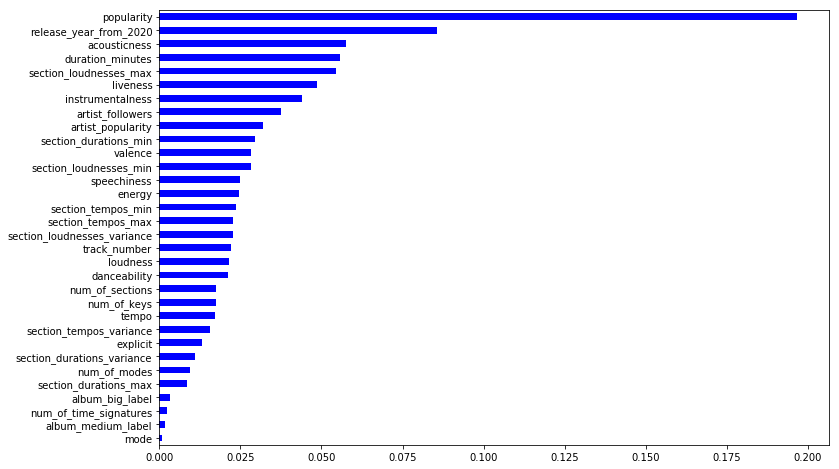

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

In [106]:
randomgrid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [114]:
from sklearn.model_selection import GridSearchCV
rf_random = GridSearchCV(estimator = rt, param_grid = randomgrid)

rf_random.fit(X_train, Y_train)
rf_random.best_params_

C:\Users\glory\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\glory\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [302]:
RF = RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=10,bootstrap=True)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
Y_pred_train=RF.predict(X_train)
testAcc=accuracy_score(Y_test, Y_pred)
trainAcc=accuracy_score(Y_train, Y_pred_train)
CVscore=cross_val_score(RF, X_train, Y_train, cv=30, scoring='accuracy', n_jobs=-1).mean()

print('Random Forest Training Accuracy : {:.3f} CV Accuracy:{:.3f} Testing Accuracy:{:.3f}'.format(trainAcc,CVscore,testAcc
    ))

C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Training Accuracy : 1.000 CV Accuracy:0.813 Testing Accuracy:0.747


In [310]:
from sklearn.metrics import roc_auc_score
rf_probs=RF.predict(X_test)
# Calculate roc auc
roc_value = roc_auc_score(Y_test, rf_probs)
roc_value

0.7607604017216643

# predict on the global dataset

In [116]:
GlobalDF=pd.read_csv("spotify_dat.csv")
GlobalDF.shape

(21445, 74)

In [141]:
Globaldf = GlobalDF[GlobalDF['Rating01'].isna()]

x_glob=Globaldf[['artist_popularity',
       'artist_followers', 'explicit', 'popularity', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
        'mode', 'num_of_sections',
       'num_of_keys', 'num_of_modes', 'num_of_time_signatures',
        'release_year_from_2020',
       'duration_minutes', 'section_durations_variance',
       'section_durations_min', 'section_durations_max',
       'section_loudnesses_variance', 'section_loudnesses_min',
       'section_loudnesses_max', 'section_tempos_variance',
       'section_tempos_min', 'section_tempos_max', 'album_big_label',
       'album_medium_label']]
ynu=RF.predict(x_glob)
ynu=pd.DataFrame(ynu)
Globaldf.reset_index(drop=True, inplace=True)

Globaldf['AddPlylist01']=ynu


'''
,'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'overall_key_1', 'overall_key_2', 'overall_key_3',
       'overall_key_4', 'overall_key_5', 'overall_key_6', 'overall_key_7',
       'overall_key_8', 'overall_key_9', 'overall_key_10', 'overall_key_11'
'''
ynu

C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     0.0
...    ...
21041  1.0
21042  1.0
21043  0.0
21044  1.0
21045  0.0
21046  0.0
21047  0.0
21048  0.0
21049  0.0
21050  0.0
21051  0.0
21052  0.0
21053  0.0
21054  1.0
21055  0.0
21056  1.0
21057  1.0
21058  0.0
21059  1.0
21060  0.0
21061  0.0
21062  0.0
21063  0.0
21064  0.0
21065  0.0
21066  0.0
21067  0.0
21068  0.0
21069  0.0
21070  0.0

[21071 rows x 1 columns]

In [144]:
pred = RF.predict_proba(x_glob)
predVals=pd.DataFrame(pred)
#globalDF=pd.concat([predVals, Globaldf], axis=1)
Globaldf['0']=predVals[0]
Globaldf['1']=predVals[1]
#predVals
#Globaldf
#predVals = predVals.apply(pd.to_numeric, errors='coerce')
Globaldf

C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\glory\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Unnamed: 0                                               name  \
0               0               Keep It Alive! Instro (Instrumental)   
1               1                                          Take Time   
2               2                                   Heart of Courage   
3               3                                        See You All   
4               4                                             I'm So   
5               5                                           Star Sky   
6               6                                       Love Project   
7               7                                      Night Shivers   
8               8              Heart (Instrumental) [Deluxe Edition]   
9               9                                            Aminals   
10             10                      Crowd, Get Ready To Be Jammed   
11             11                                         The Poncho   
12             12                                          Days Gone   
13             13                                       It's So Hard   
14             14                                     Dillatronic 01   
15             15                                            Deserts   
16             16                                        Hinterlands   
17             17                                        Tweedle Dee   
18             18                                      Keep on Going   
19             19                                              Blasé   
20             20                                            No Sass   
21             21                                         Tu es beau   
22             22                                       Crazy Dancer   
23             23                              Can't Leave the Night   
24             24                               Dance (Instrumental)   
25             25                                          In My Car   
26             26                                Guns and Cigarettes   
27             27                                               Juju   
28             28                Shooting Stars - Tribute To Nujabes   
29             29                                               Easy   
...           ...                                                ...   
21041       21415                             If I Ever Fall In Love   
21042       21416                               I Could Fall In Love   
21043       21417                                              Intro   
21044       21418                                           infamous   
21045       21419                              I Wanna Be Your Lover   
21046       21420  Violin Sonata No. 5 in F Major, Op. 24 "Spring...   
21047       21421  String Quartet No.14 in C sharp minor, Op.131:...   
21048       21422  Piano Concerto No.5 in E flat major Op.73 -"Em...   
21049       21423                               Blame It On My Youth   
21050       21424                                       Say It Right   
21051       21425                                       Take It Away   
21052       21426                              Politically Incorrect   
21053       21427                                        Infatuation   
21054       21428                           I Once Sat at Your Table   
21055       21429                                  Lesson In Leavin'   
21056       21430  Piano Sonata No.3 in B minor, Op.58: 2. Scherz...   
21057       21431                                            It's Ok   
21058       21432  Waltzes, Op. 64: No. 1, Molto vivace in D-Flat...   
21059       21433                                             I Care   
21060       21434                         The Remedy (I Won't Worry)   
21061       21435                           Praise You In This Storm   
21062       21436                         She's In Love With The Boy   
21063       21437                                     So Predictable   
21064       21438                              

# Make Playlists

In [178]:
#Playlist 1, chill playlist
LikedSongs=Globaldf.loc[Globaldf['AddPlylist01'] == 1]
Chill=LikedSongs.loc[(LikedSongs['tempo']<80)&(LikedSongs['valence']>.5)]
Chill=Chill.sort_values(by=['1'])

Chill=Chill.tail(10)
Chill
Chill=Chill[['name', 'uri', 'album_uri','album_name', 'artist_uri','artist_name','AddPlylist01']]
Chill.to_csv('Classification_Chil.csv',index=False)

In [177]:
#Dance playlist
Dance=LikedSongs.loc[(LikedSongs['danceability']>.7)]
Dance=Dance.sort_values(by=['1'])
Dance=Dance.tail(10)
#(LikedSongs['1']>.7)
Dance=Dance[['name', 'uri', 'album_uri','album_name', 'artist_uri','artist_name','AddPlylist01']]
Dance.to_csv('Classification_Dance.csv',index=False)

In [165]:
#Discover Playlist

Discover=LikedSongs.loc[(LikedSongs['popularity']<60)&(LikedSongs['artist_popularity']<80)]
Discover=Discover.sort_values(by=['1'])
Discover=Discover.tail(10)
Discover

Unnamed: 0                                               name  \
858          858  Counting Bodies Like Sheep to the Rhythm of th...   
753          753                                     Triumph Proper   
775          775                                         Gilded Age   
1007        1007                                            Ratchet   
854          854              Peace, Love, and Understanding (Live)   
853          853                             What's Going on (Live)   
849          849                                     Imagine (Live)   
860          860                                 By and Down (Live)   
855          855                                   The Noose (Live)   
852          852                                        Rose (Live)   

                                       uri  \
858   spotify:track:1ge7L8SZ5Hmj6uSgBsV0O2   
753   spotify:track:5Z4FHrrNRUAkbrNwUrBQZS   
775   spotify:track:5iteOsLcSrIL14MdnMi5NP   
1007  spotify:track:3fHCCLQ90CZlDl7Sbw08Tt   
854   spotify:track:4bMLhTlKCPcTpd7NEKqgZ1   
853   spotify:track:0zO4KiLZoYYf2TpEDRUGVN   
849   spotify:track:7GiAqIklZSatsLgAABiIRo   
860   spotify:track:2tGwGcuIzw8KS9fxgHEkcD   
855   spotify:track:67mmbYrI74wMAPosCCP7fT   
852   spotify:track:6J3Be8BEftAXCVQ8GFvLDx   

                                 album_uri                         album_name  \
858   spotify:album:05ghFLMEOZqBJdS76hws7F  Stone and Echo: Live at Red Rocks   
753   spotify:album:6NqmUxoQx9mWYXrep2Z55c             End of the World Party   
775   spotify:album:15lbqTMBsrrI3Buharjx8O                         Gilded Age   
1007  spotify:album:3zRMT26AYwaPMcN9W2blev          Shapeshifter II: Outbreak   
854   spotify:album:05ghFLMEOZqBJdS76hws7F  Stone and Echo: Live at Red Rocks   
853   spotify:album:05ghFLMEOZqBJdS76hws7F  Stone and Echo: Live at Red Rocks   
849   spotify:album:05ghFLMEOZqBJdS76hws7F  Stone and Echo: Live at Red Rocks   
860   spotify:album:05ghFLMEOZqBJdS76hws7F  Stone and Echo: Live at Red Rocks   
855   spotify:album:05ghFLMEOZqBJdS76hws7F  Stone and Echo: Live at Red Rocks   
852   spotify:album:05ghFLMEOZqBJdS76hws7F  Stone and Echo: Live at Red Rocks   

      album_popularity                             artist_uri  \
858                 44  spotify:artist:4DFhHyjvGYa9wxdHUjtDkc   
753                 34  spotify:artist:25oLRSUjJk4YHNUsQXk7Ut   
775                 33  spotify:artist:1a4N2lwra7WGjwCDJS1Dkk   
1007                30  spotify:artist:6qauwCj8W2mTcDGbyDGo6O   
854                 44  spotify:artist:4DFhHyjvGYa9wxdHUjtDkc   
853                 44  spotify:artist:4DFhHyjvGYa9wxdHUjtDkc   
849                 44  spotify:artist:4DFhHyjvGYa9wxdHUjtDkc   
860                 44  spotify:artist:4DFhHyjvGYa9wxdHUjtDkc   
855                 44  spotify:artist:4DFhHyjvGYa9wxdHUjtDkc   
852                 44  spotify:artist:4DFhHyjvGYa9wxdHUjtDkc   

           artist_name  artist_popularity  artist_followers  ...  \
858   A Perfect Circle                 68           1062296  ...   
753               GRiZ                 67            274880  ...   
775             Lotus                  49             54078  ...   
1007              Tauk                 44             36820  ...   
854   A Perfect Circle                 68           1062296  ...   
853   A Perfect Circle                 68           1062296  ...   
849   A Perfect Circle                 68           1062296  ...   
860   A Perfect Circle                 68           1062296  ...   
855   A Perfect Circle                 68           1062296  ...   
852   A Perfect Circle                 68           1062296  ...   

      overall_key_5  overall_key_6  overall_key_7  overall_key_8  \
858               0              0              0              1   
753               0              0              0              1   
775               0              0              0              0   
1007              0              0              0              0   
854               0 

In [176]:
Discover=Discover[['name', 'uri', 'album_uri','album_name', 'artist_uri','artist_name','AddPlylist01']]
Discover.to_csv('Classification_Discover.csv',index=False)